# Event-related fields

Event-related fields (ERFs) as well as event-related potentials are generated by neuronal activity elicited by a given events. They are often used in cognitive and clinical neurosciene to quantify the brain activity associated with a given task (*Luck 2014, Woodman 2010*). The aim of this section is to generate event-related fields (ERFs) in response to the visual input and to do some simple plotting of time course and topographies. Event-related fields are generated by neuronal activity phase-locked to a given event.
Preparation

## Preparation
Import the relevant modules

In [1]:
import os.path as op
import os
import mne
from mne_bids import BIDSPath, read_raw_bids 
from mne.viz import plot_evoked_topo
import matplotlib.pyplot as plt
import numpy as np


File overview

The chapter relies on the input file (embedded in the BIDS structure):

< BIDS_ROOT >/derivatives/Analysis/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-01_epo.fif

#### Set the local paths of the data:


In [2]:
subject = '01'
session = '01'
task = 'SpAtt'  
run = '01'  
meg_suffix = 'meg'
epo_suffix = 'epo'

data_path='C:/Users/rakshita/Documents/Cerca_raw_files'
bids_root = op.join(data_path, "Cerca_Spatt_BIDS")
deriv_root = op.join(bids_root, "derivatives/analysis")
bids_path = BIDSPath(subject=subject, session=session,
            task=task, run=run, suffix=epo_suffix, datatype='meg',
            root=deriv_root, extension='.fif', check=False)
print(bids_path.basename,bids_path.fpath)

sub-01_ses-01_task-SpAtt_run-01_epo.fif C:\Users\rakshita\Documents\Cerca_raw_files\Cerca_Spatt_BIDS\derivatives\analysis\sub-01\ses-01\meg\sub-01_ses-01_task-SpAtt_run-01_epo.fif


## Read the epochs

In [3]:
epochs = mne.read_epochs(bids_path.fpath,
                         proj = False,
                         preload=True,
                         verbose=False)


## Averaging the trial data

Identify the epochs for the left condition with respect to the onset of the moving gratings and then average over trials. Subsequently apply a lowpass filter at 30 Hz and crop the data to the time interval from -100 to 400 ms from stimulus onset. The 30 Hz low-pass filter is typically used for cognitive type event-related responses.


In [4]:
evoked_left= epochs['cue_Left'].copy().average(method='mean').filter(0.0, 30).crop(-0.1,0.4)

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 331 samples (0.441 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s



## Plotting event-related fields

To plot the single trials and the averaged event-related fields for a single magnetometer write:


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 331 samples (0.441 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 3041 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 3527 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed:    1.5s
[Parallel(n_job

Not setting metadata
174 matching events found
No baseline correction applied
0 projection items activated


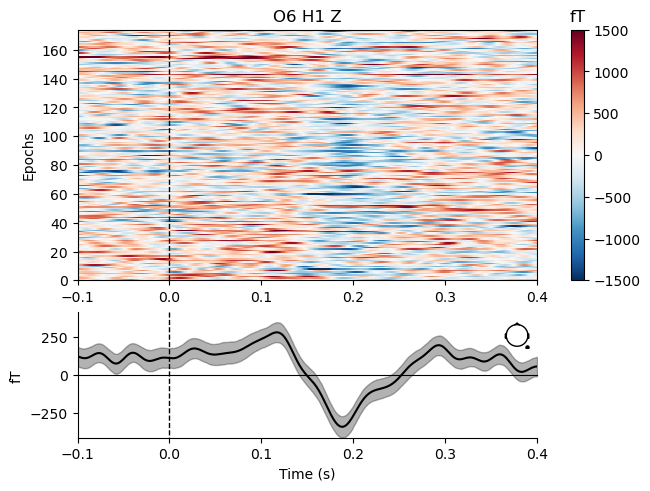

[<Figure size 640x480 with 4 Axes>]

In [5]:
epochs['cue_Left'].copy().filter(0.0,30).crop(-0.1,0.4).plot_image(picks=['O6 H1 Z'], vmin=-1500, vmax=1500)

## To plot a topographic map of all the sensors write:

To enable interactive plotting, use %matplotlib qt instead of %matplotlib inline. This allows you to click on individual sensor plots to enlarge and inspect them in more detail.

Applying baseline correction (mode: mean)


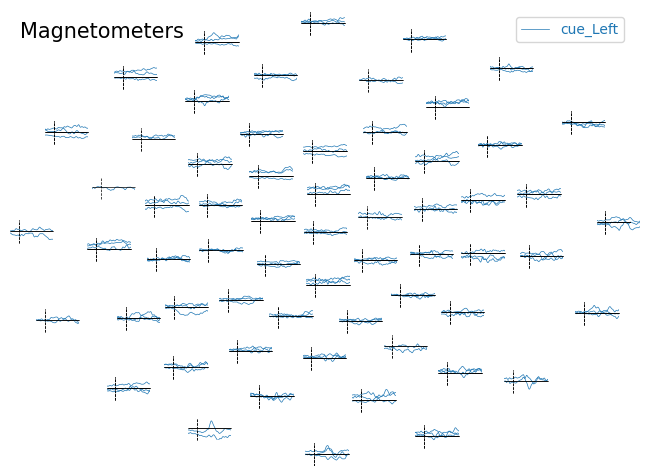

In [7]:
#%matplotlib qt
%matplotlib inline
evoked_left.copy().apply_baseline(baseline=(-0.1, 0))
evoked_left.copy().pick('mag').plot_topo(title = 'Magnetometers');

## To plot a topographic map of the response at any specific instant of time write:

Since the Cerca/Quspin system uses triaxial sensors that measure the magnetic field along three mutually orthogonal directions, it is important to identify and separate the components corresponding to each direction and plot them individually.

In [8]:
# Identify and separate X, Y and Z sensors
OPMX = [item for item in evoked_left.info['ch_names'] if item.endswith("X")]
OPMY = [item for item in evoked_left.info['ch_names'] if item.endswith("Y")]
OPMZ = [item for item in evoked_left.info['ch_names'] if item.endswith("Z") and not item.startswith("BNC")]

# Create copies of evoked with selected channels
evoked_x = evoked_left.copy().pick_channels(OPMX)
evoked_y = evoked_left.copy().pick_channels(OPMY)
evoked_z = evoked_left.copy().pick_channels(OPMZ)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


#### Topographic map 'X' Sensors at 111ms

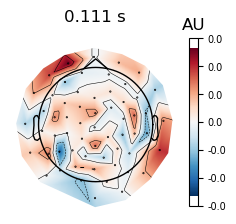

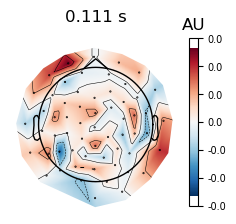

In [10]:
evoked_x.plot_topomap(
    times=[0.111],
    ch_type='mag',
    time_unit='s',
    show_names=False,
    size=1.5,
    res=128,
    image_interp='linear',
    colorbar=True,
    scalings=1.0,  
)

#### Topographic map 'Y' Sensors

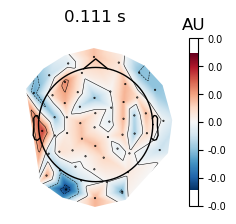

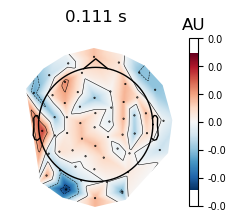

In [11]:
evoked_y.plot_topomap(
    times=[0.111],
    ch_type='mag',
    time_unit='s',
    show_names=False,
    size=1.5,
    res=128,
    image_interp='linear',
    colorbar=True,
    scalings=1.0,
)

#### Topographic map 'Z' Sensors

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


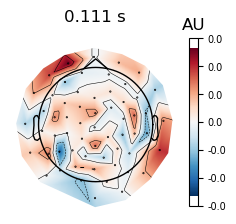

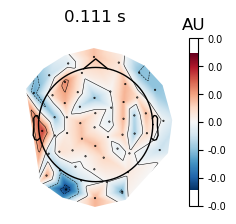

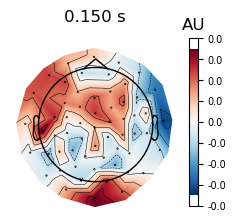

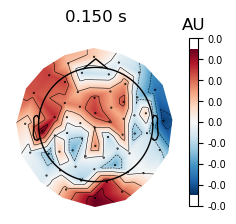

In [ ]:
evoked_z.plot_topomap(
    times=[0.150],
    ch_type='mag',
    time_unit='s',
    show_names=False,
    size=1.5,
    res=128,
    image_interp='linear',
    colorbar=True,
    scalings=1.0,
)

**Question 1**: Explain how an equivalent current dipole (ECD) can account for the posterior event-related field by drawing the ECD on top of the topographic plot (hint: consider the 'right-hand rule')

#### Now plot the topographic maps across multiple time points

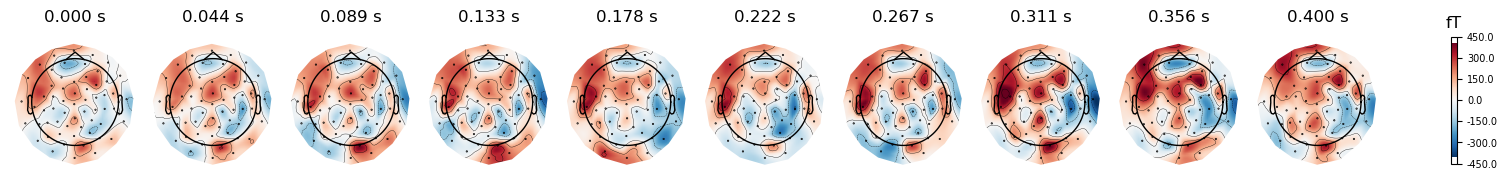

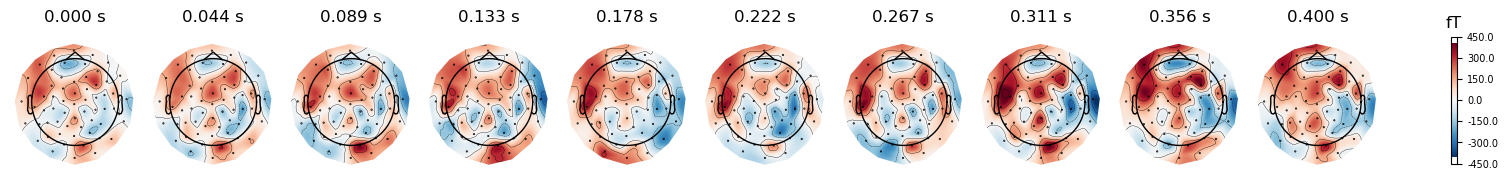

In [29]:
# Plot the topomaps across all these time points
time_ins = np.linspace(0, 0.4, num=10)
evoked_z.plot_topomap(times=time_ins, ch_type='mag', time_unit='s')


## Preregistration and publications

Publication, example:

"Prior to calculating the event-related fields, the data were lowpass filtered at 30 Hz (non-causal finite impulse response filter implemented using a Hamming window and a 441 sample filter length). After averaging, a 100 ms baseline was subtracted."



## References
Woodman, G. F. (2010). A brief introduction to the use of event-related potentials in studies of perception and attention. *Attention, Perception, & Psychophysics*, *72*(8), 2031–2046. https://doi.org/10.3758/APP.72.8.2031

Luck, S. J. (2014). *An Introduction to the Event-Related Potential Technique* (2nd ed.). Bradford Books.


(many of the recommendation for calculated event-related potentials also apply to calculating event-related fields)
